# کتابخانه‌های مورد نیاز

In [161]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np
from sklearn.metrics import confusion_matrix

In [135]:
iris = load_iris(as_frame=True) # Convert to Data Frame as Pandas

In [133]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

# تقسیم‌بندی داده‌ها به آموزشی و آزمایشی

In [136]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8080)

print(f"{X.shape=}, {y.shape=}")
print(f"{X_train.shape=}, {y_train.shape=}")
print(f"{X_test.shape=}, {y_test.shape=}")

X.shape=(150, 4), y.shape=(150,)
X_train.shape=(105, 4), y_train.shape=(105,)
X_test.shape=(45, 4), y_test.shape=(45,)


# بدست آوردن بهترین امتیاز و تعداد همسایه‌ها

In [158]:
best_neighbors = 0
best_test_score = 0
train_score = 0

X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8080)

for i in range(3, 33, 2):
    clf = KNeighborsClassifier(n_neighbors=i, weights="uniform") # استفاده از وزن‌های یکسان
    clf.fit(X_train, y_train)
    print(f"[n_neighbors: {i}]\t[score train: {clf.score(X_train, y_train):.6f}]\t[score test: {clf.score(X_test, y_test):.6f}]")
    if clf.score(X_test, y_test) >= best_test_score and clf.score(X_test, y_test) >= train_score:
        best_test_score = clf.score(X_test, y_test)
        best_neighbors = i
        train_score = clf.score(X_train, y_train)
    
print(f"\nbest test score is [{best_test_score:.4f}] & train score is [{train_score:.4f}] for neighbors [{best_neighbors}]")

[n_neighbors: 3]	[score train: 0.952381]	[score test: 0.977778]
[n_neighbors: 5]	[score train: 0.980952]	[score test: 0.955556]
[n_neighbors: 7]	[score train: 0.980952]	[score test: 0.955556]
[n_neighbors: 9]	[score train: 0.990476]	[score test: 0.955556]
[n_neighbors: 11]	[score train: 0.990476]	[score test: 0.977778]
[n_neighbors: 13]	[score train: 0.990476]	[score test: 0.977778]
[n_neighbors: 15]	[score train: 0.990476]	[score test: 0.977778]
[n_neighbors: 17]	[score train: 0.980952]	[score test: 0.977778]
[n_neighbors: 19]	[score train: 0.990476]	[score test: 0.933333]
[n_neighbors: 21]	[score train: 0.980952]	[score test: 0.911111]
[n_neighbors: 23]	[score train: 0.980952]	[score test: 0.933333]
[n_neighbors: 25]	[score train: 0.961905]	[score test: 0.933333]
[n_neighbors: 27]	[score train: 0.971429]	[score test: 0.933333]
[n_neighbors: 29]	[score train: 0.980952]	[score test: 0.911111]
[n_neighbors: 31]	[score train: 0.971429]	[score test: 0.911111]

best test score is [0.9778] 

In [167]:
print(confusion_matrix(y_train, clf.predict(X_train)))
print("")
print(confusion_matrix(y_test, clf.predict(X_test)))

[[40  0  0]
 [ 0 35  0]
 [ 0  0 30]]

[[10  0  0]
 [ 0 15  0]
 [ 0  3 17]]


In [163]:
best_neighbors = 0
best_test_score = 0
train_score = 0

X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8080)

for i in range(3, 33, 2):
    clf = KNeighborsClassifier(n_neighbors=i, weights="distance") # استفاده از وزن‌های متناسب با فاصله
    clf.fit(X_train, y_train)
    print(f"[n_neighbors: {i}]\t[score train: {clf.score(X_train, y_train):.6f}]\t[score test: {clf.score(X_test, y_test):.6f}]")
    if clf.score(X_test, y_test) >= best_test_score and clf.score(X_test, y_test) >= train_score:
        best_test_score = clf.score(X_test, y_test)
        best_neighbors = i
        train_score = clf.score(X_train, y_train)
    

print(f"\nbest test score is [{best_test_score:.4f}] & train score is [{train_score:.4f}] for neighbors [{best_neighbors}]")

[n_neighbors: 3]	[score train: 1.000000]	[score test: 0.977778]
[n_neighbors: 5]	[score train: 1.000000]	[score test: 0.977778]
[n_neighbors: 7]	[score train: 1.000000]	[score test: 0.977778]
[n_neighbors: 9]	[score train: 1.000000]	[score test: 0.977778]
[n_neighbors: 11]	[score train: 1.000000]	[score test: 0.977778]
[n_neighbors: 13]	[score train: 1.000000]	[score test: 0.977778]
[n_neighbors: 15]	[score train: 1.000000]	[score test: 0.977778]
[n_neighbors: 17]	[score train: 1.000000]	[score test: 0.977778]
[n_neighbors: 19]	[score train: 1.000000]	[score test: 0.977778]
[n_neighbors: 21]	[score train: 1.000000]	[score test: 0.977778]
[n_neighbors: 23]	[score train: 1.000000]	[score test: 0.955556]
[n_neighbors: 25]	[score train: 1.000000]	[score test: 0.933333]
[n_neighbors: 27]	[score train: 1.000000]	[score test: 0.933333]
[n_neighbors: 29]	[score train: 1.000000]	[score test: 0.933333]
[n_neighbors: 31]	[score train: 1.000000]	[score test: 0.933333]

best test score is [0.9778] 

In [168]:
print(confusion_matrix(y_train, clf.predict(X_train)))
print("")
print(confusion_matrix(y_test, clf.predict(X_test)))

[[40  0  0]
 [ 0 35  0]
 [ 0  0 30]]

[[10  0  0]
 [ 0 15  0]
 [ 0  3 17]]


# رسم مرز تصمیم برای دو حالت وزن‌ها

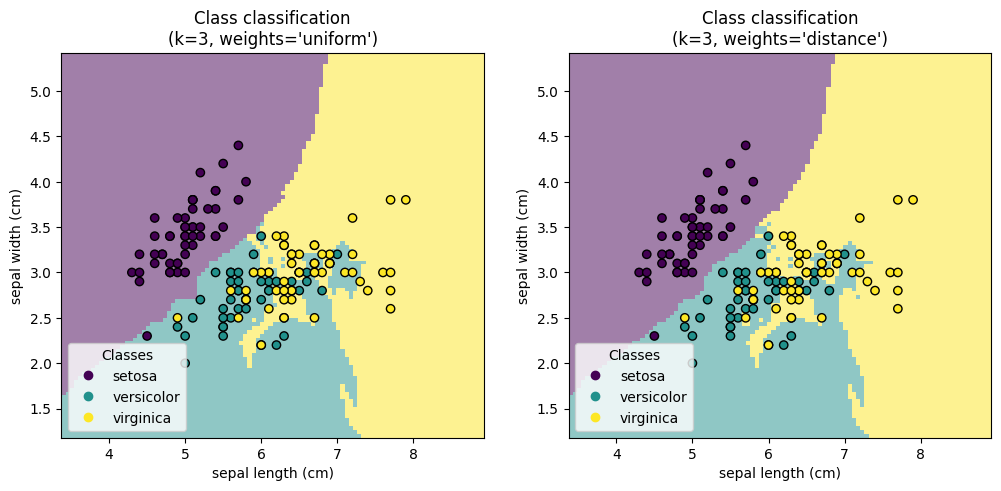

In [160]:
iris = load_iris(as_frame=True) # دوباره آموزش دادن مدل برای یادگیری دو ویژگی
X = iris.data[["sepal length (cm)", "sepal width (cm)"]] # استفاده از دو ویژگی برای رسم شکل
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8080)

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf = KNeighborsClassifier(n_neighbors=best_neighbors, weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"Class classification\n(k={best_neighbors}, weights={weights!r})"
    )

plt.show()